In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
--------------

In [6]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


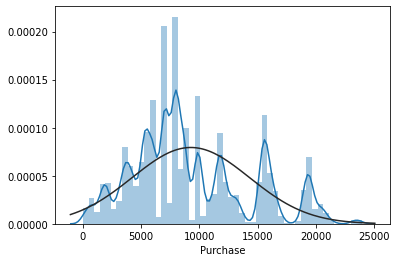

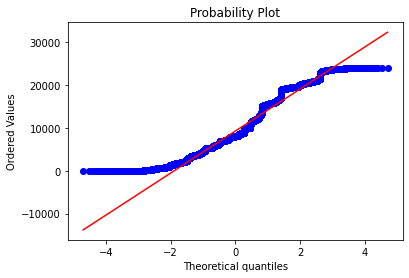

In [7]:
sns.distplot(train_df['Purchase'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Purchase'], plot=plt)

In [8]:
'''
train_df['purchase_band']=0
train_df.loc[train_df['Purchase']<=5000,'purchase_band']=0
train_df.loc[(train_df['Purchase']>5000)&(train_df['Purchase']<=7500),'purchase_band']=1
train_df.loc[(train_df['Purchase']>7500)&(train_df['Purchase']<=10000),'purchase_band']=2
train_df.loc[(train_df['Purchase']>10000)&(train_df['Purchase']<=15000),'purchase_band']=3
train_df.loc[(train_df['Purchase']>15000)&(train_df['Purchase']<=17500),'purchase_band']=4
train_df.loc[train_df['Purchase']>17500,'purchase_band']=5
sns.countplot(x='purchase_band', data=train_df)
'''

"\ntrain_df['purchase_band']=0\ntrain_df.loc[train_df['Purchase']<=5000,'purchase_band']=0\ntrain_df.loc[(train_df['Purchase']>5000)&(train_df['Purchase']<=7500),'purchase_band']=1\ntrain_df.loc[(train_df['Purchase']>7500)&(train_df['Purchase']<=10000),'purchase_band']=2\ntrain_df.loc[(train_df['Purchase']>10000)&(train_df['Purchase']<=15000),'purchase_band']=3\ntrain_df.loc[(train_df['Purchase']>15000)&(train_df['Purchase']<=17500),'purchase_band']=4\ntrain_df.loc[train_df['Purchase']>17500,'purchase_band']=5\nsns.countplot(x='purchase_band', data=train_df)\n"

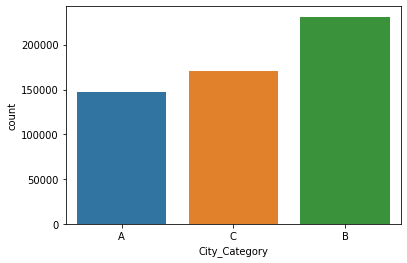

In [9]:
sns.countplot(x="City_Category", data=train_df)

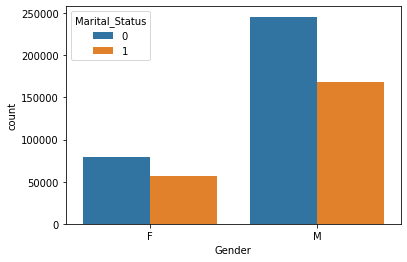

In [10]:
sns.countplot(x="Gender", hue="Marital_Status", data=train_df)

In [11]:
train_df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00075042       1
P00068342       1
P00072042       1
P00126742       1
P00013442       1
Name: Product_ID, Length: 3631, dtype: int64

In [12]:
#sns.jointplot(x="Product_ID", y="Purchase", data=train_df)

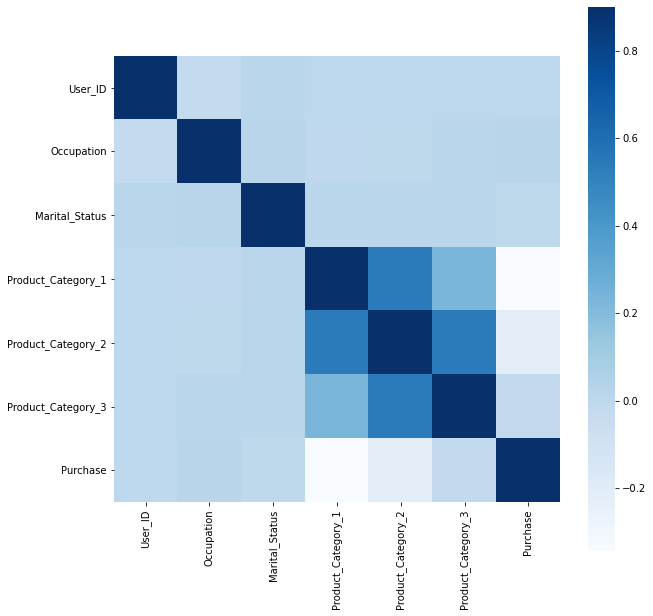

In [13]:
corr = train_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

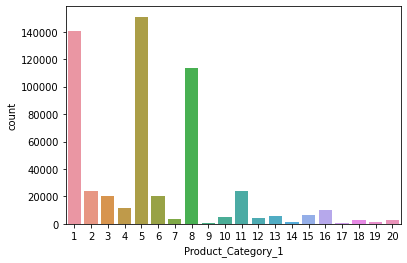

In [14]:
sns.countplot(x="Product_Category_1", data=train_df)

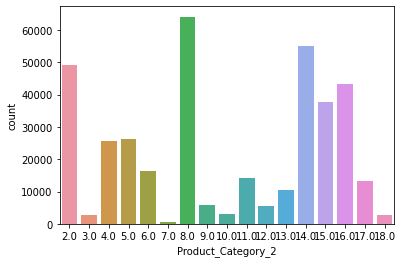

In [15]:
sns.countplot(x="Product_Category_2", data=train_df)

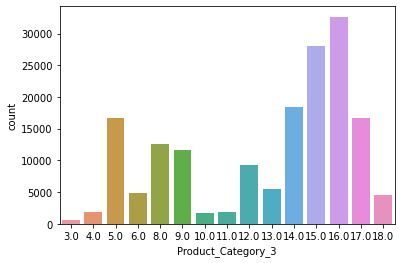

In [16]:
sns.countplot(x="Product_Category_3", data=train_df)

In [17]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
Product_Category_2,173638,72344.0
Product_Category_3,383247,162562.0


In [18]:
train_df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [3]:
y = train_df["Purchase"]
train_df=train_df.iloc[:,0:11]

In [4]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [5]:
df=pd.concat([train_df,test_df],axis=0)

In [6]:
df.shape

(783667, 11)

In [7]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,1,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,1,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,0,55+,16,C,4+,0,8,NaN,NaN


In [9]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [11]:
X=df.iloc[:,0:11]

In [28]:
df['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00068742       1
P00253842       1
P00298342       1
P00081342       1
P00307242       1
Name: Product_ID, Length: 3677, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [13]:
X.iloc[:,0]=label_x.fit_transform(X.iloc[:,0])
X.iloc[:,1]=label_x.fit_transform(X.iloc[:,1])
X.iloc[:,3]=label_x.fit_transform(X.iloc[:,3])
X.iloc[:,5]=label_x.fit_transform(X.iloc[:,5])
X.iloc[:,6]=label_x.fit_transform(X.iloc[:,6])

In [14]:
X.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,684,1,0,10,0,2,0,3,8.0,16.0
1,0,2406,1,0,10,0,2,0,1,6.0,14.0
2,0,868,1,0,10,0,2,0,12,8.0,16.0
3,0,844,1,0,10,0,2,0,12,14.0,16.0
4,1,2769,0,6,16,2,4,0,8,8.0,16.0
5,2,1857,0,2,15,0,3,0,1,2.0,16.0
6,3,1771,0,4,7,1,2,1,1,8.0,17.0
7,3,3364,0,4,7,1,2,1,1,15.0,16.0
8,3,3649,0,4,7,1,2,1,1,16.0,16.0
9,4,2665,0,2,20,0,1,1,8,8.0,16.0


In [15]:
x=np.zeros((783667, 11))
x[:,0:11]=X

In [16]:
x_train=x[0:550068,:]
x_test=x[550068:,:]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=0.3,random_state=42)

In [18]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor

In [19]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [94]:
 #A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [97]:
xgb = XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [98]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  7.9min finished



 Time taken: 0 hours 10 minutes and 21.69 seconds.


In [99]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 94.72941645, 139.67524997, 128.71806749,  98.81071456,
       111.47413842]), 'std_fit_time': array([0.40134342, 3.53614887, 3.6860983 , 1.34680811, 3.98945841]), 'mean_score_time': array([2.11840049, 4.14064296, 4.08745964, 4.15819438, 3.00435201]), 'std_score_time': array([0.00800362, 0.04013885, 0.04617399, 0.03355137, 0.01829621]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?

In [100]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.6, verbosity=1)

In [101]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric= 'rmse' , eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:10351.9
[1]	validation_0-rmse:10166.9
[2]	validation_0-rmse:9984.16
[3]	validation_0-rmse:9805.41
[4]	validation_0-rmse:9631.24
[5]	validation_0-rmse:9478.73
[6]	validation_0-rmse:9311.62
[7]	validation_0-rmse:9148.08
[8]	validation_0-rmse:8987.68
[9]	validation_0-rmse:8831.09
[10]	validation_0-rmse:8678.09
[11]	validation_0-rmse:8543.93
[12]	validation_0-rmse:8397.52
[13]	validation_0-rmse:8269.71
[14]	validation_0-rmse:8129.52
[15]	validation_0-rmse:7992.81
[16]	validation_0-rmse:7859.55
[17]	validation_0-rmse:7743.3
[18]	validation_0-rmse:7629.74
[19]	validation_0-rmse:7519.77
[20]	validation_0-rmse:7397.49
[21]	validation_0-rmse:7277.58
[22]	validation_0-rmse:7160.8
[23]	validation_0-rmse:7046.26
[24]	validation_0-rmse:6948.1
[25]	validation_0-rmse:6839.48
[26]	validation_0-rmse:6746.95
[27]	validation_0-rmse:6657.33
[28]	validation_0-rmse:6569.89
[29]	validation_0-rmse:6484.39
[30]	validation_0-rmse:6386.4
[31]	validation_0-rmse:6290.96
[32]	validation_0-rmse

[261]	validation_0-rmse:2869.02
[262]	validation_0-rmse:2868.67
[263]	validation_0-rmse:2868.26
[264]	validation_0-rmse:2867.85
[265]	validation_0-rmse:2867.55
[266]	validation_0-rmse:2867.2
[267]	validation_0-rmse:2866.91
[268]	validation_0-rmse:2866.51
[269]	validation_0-rmse:2865.89
[270]	validation_0-rmse:2865.16
[271]	validation_0-rmse:2864.8
[272]	validation_0-rmse:2864.35
[273]	validation_0-rmse:2863.94
[274]	validation_0-rmse:2863.53
[275]	validation_0-rmse:2863.25
[276]	validation_0-rmse:2862.71
[277]	validation_0-rmse:2862.35
[278]	validation_0-rmse:2861.83
[279]	validation_0-rmse:2861.51
[280]	validation_0-rmse:2861
[281]	validation_0-rmse:2860.68
[282]	validation_0-rmse:2860.11
[283]	validation_0-rmse:2859.86
[284]	validation_0-rmse:2859.56
[285]	validation_0-rmse:2859.02
[286]	validation_0-rmse:2858.55
[287]	validation_0-rmse:2857.95
[288]	validation_0-rmse:2857.49
[289]	validation_0-rmse:2856.98
[290]	validation_0-rmse:2856.62
[291]	validation_0-rmse:2856.5
[292]	validati

[519]	validation_0-rmse:2804.54
[520]	validation_0-rmse:2804.37
[521]	validation_0-rmse:2804.3
[522]	validation_0-rmse:2804.1
[523]	validation_0-rmse:2803.86
[524]	validation_0-rmse:2803.81
[525]	validation_0-rmse:2803.69
[526]	validation_0-rmse:2803.56
[527]	validation_0-rmse:2803.25
[528]	validation_0-rmse:2802.91
[529]	validation_0-rmse:2802.82
[530]	validation_0-rmse:2802.58
[531]	validation_0-rmse:2802.47
[532]	validation_0-rmse:2802.27
[533]	validation_0-rmse:2802.03
[534]	validation_0-rmse:2801.88
[535]	validation_0-rmse:2801.69
[536]	validation_0-rmse:2801.47
[537]	validation_0-rmse:2801.24
[538]	validation_0-rmse:2801.17
[539]	validation_0-rmse:2801.15
[540]	validation_0-rmse:2801.05
[541]	validation_0-rmse:2800.83
[542]	validation_0-rmse:2800.68
[543]	validation_0-rmse:2800.59
[544]	validation_0-rmse:2800.42
[545]	validation_0-rmse:2800.29
[546]	validation_0-rmse:2800.21
[547]	validation_0-rmse:2799.7
[548]	validation_0-rmse:2799.57
[549]	validation_0-rmse:2799.44
[550]	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.6, verbosity=1)

In [102]:
y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_pred,y_test))

In [104]:
rms

2791.8177628552785

In [105]:
yt_pred=model.predict(x_test)

In [106]:
submission = pd.DataFrame({ "Purchase": yt_pred,
                            "User_ID": test_df["User_ID"],
                            "Product_ID": test_df["Product_ID"]})
submission.to_csv('submission.csv', index=False)

In [20]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [21]:
 #A parameter grid for LightGBM
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params = {
            'n_estimators': [400, 700, 1000],
            'colsample_bytree': [0.7, 0.8],
            'max_depth': [15,20,25],
            'num_leaves': [50, 100, 200],
            'reg_alpha': [1.1, 1.2, 1.3],
            'reg_lambda': [1.1, 1.2, 1.3],
            'min_split_gain': [0.3, 0.4],
            'subsample': [0.7, 0.8, 0.9],
            'subsample_freq': [20]
        }

new_params = {'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [23]:
model = lgb.LGBMRegressor(learning_rate=0.01, n_estimators=5000, objective='regression',
                    silent=True, nthread=1)

In [24]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model, param_distributions=new_params, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 19.6min finished



 Time taken: 0 hours 21 minutes and 35.43 seconds.


In [25]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('lgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([103.75580923, 159.93415793, 173.13787246, 164.87371556,
       137.79793874]), 'std_fit_time': array([ 0.18701568,  6.54027015, 31.64743587, 22.69313448,  1.77317881]), 'mean_score_time': array([150.84096225, 174.17487303, 146.50486056, 135.70420663,
       167.61732109]), 'std_score_time': array([0.905938  , 1.39957879, 5.6282549 , 4.5135635 , 1.89526378]), 'param_colsample_bytree': masked_array(data=[0.5837393077292833, 0.8956369520104168,
                   0.9524956937759248, 0.9894130001745846,
                   0.4165178996588055],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_samples': masked_array(data=[289, 232, 424, 421, 297],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[0.1, 10.0, 10.0, 10.0, 1e-05],
             mask=[False, False, False, False, False],
  

In [26]:
model_params = {'boosting_type':'gbdt', 'colsample_bytree':0.8956369520104168,
                'importance_type':'split', 'learning_rate':0.01, 'max_depth':-1,
                'min_child_samples':232, 'min_child_weight':10.0, 'min_split_gain':0.0,
                'n_estimators':5000, 'n_jobs':-1, 'nthread':1, 'num_leaves':29,
                'objective':'regression', 'random_state':'None', 'reg_alpha':10,
                'reg_lambda':0, 'silent':'True', 'subsample':0.5905395499928763,
                'subsample_for_bin':200000, 'subsample_freq':0, 'metric':['l2', 'auc'], 'seed':120}

'''
model_param = {
    "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
}
'''
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [27]:
model = lgb.LGBMRegressor(**model_params)

In [29]:
model.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=2000)

[1]	valid_0's l1: 4036.4	valid_0's l2: 2.48797e+07	valid_0's auc: 1
Training until validation scores don't improve for 2000 rounds
[2]	valid_0's l1: 4008.29	valid_0's l2: 2.45581e+07	valid_0's auc: 1
[3]	valid_0's l1: 3980.46	valid_0's l2: 2.4243e+07	valid_0's auc: 1
[4]	valid_0's l1: 3952.92	valid_0's l2: 2.39342e+07	valid_0's auc: 1
[5]	valid_0's l1: 3925.91	valid_0's l2: 2.36363e+07	valid_0's auc: 1
[6]	valid_0's l1: 3898.94	valid_0's l2: 2.33395e+07	valid_0's auc: 1
[7]	valid_0's l1: 3872.25	valid_0's l2: 2.30487e+07	valid_0's auc: 1
[8]	valid_0's l1: 3845.83	valid_0's l2: 2.27637e+07	valid_0's auc: 1
[9]	valid_0's l1: 3819.66	valid_0's l2: 2.24843e+07	valid_0's auc: 1
[10]	valid_0's l1: 3793.79	valid_0's l2: 2.22103e+07	valid_0's auc: 1
[11]	valid_0's l1: 3768.16	valid_0's l2: 2.19419e+07	valid_0's auc: 1
[12]	valid_0's l1: 3743.05	valid_0's l2: 2.1683e+07	valid_0's auc: 1
[13]	valid_0's l1: 3733.83	valid_0's l2: 2.15898e+07	valid_0's auc: 1
[14]	valid_0's l1: 3708.95	valid_0's l2

[119]	valid_0's l1: 2447.59	valid_0's l2: 1.03639e+07	valid_0's auc: 1
[120]	valid_0's l1: 2442.21	valid_0's l2: 1.03278e+07	valid_0's auc: 1
[121]	valid_0's l1: 2436.91	valid_0's l2: 1.02921e+07	valid_0's auc: 1
[122]	valid_0's l1: 2431.79	valid_0's l2: 1.02574e+07	valid_0's auc: 1
[123]	valid_0's l1: 2426.79	valid_0's l2: 1.02234e+07	valid_0's auc: 1
[124]	valid_0's l1: 2421.9	valid_0's l2: 1.01896e+07	valid_0's auc: 1
[125]	valid_0's l1: 2417.11	valid_0's l2: 1.01566e+07	valid_0's auc: 1
[126]	valid_0's l1: 2412.52	valid_0's l2: 1.01243e+07	valid_0's auc: 1
[127]	valid_0's l1: 2407.96	valid_0's l2: 1.00924e+07	valid_0's auc: 1
[128]	valid_0's l1: 2403.5	valid_0's l2: 1.00613e+07	valid_0's auc: 1
[129]	valid_0's l1: 2399.28	valid_0's l2: 1.00308e+07	valid_0's auc: 1
[130]	valid_0's l1: 2395.09	valid_0's l2: 1.00005e+07	valid_0's auc: 1
[131]	valid_0's l1: 2391.08	valid_0's l2: 9.97186e+06	valid_0's auc: 1
[132]	valid_0's l1: 2387.17	valid_0's l2: 9.94305e+06	valid_0's auc: 1
[133]	va

[235]	valid_0's l1: 2226.55	valid_0's l2: 8.61456e+06	valid_0's auc: 1
[236]	valid_0's l1: 2225.64	valid_0's l2: 8.60808e+06	valid_0's auc: 1
[237]	valid_0's l1: 2224.81	valid_0's l2: 8.60183e+06	valid_0's auc: 1
[238]	valid_0's l1: 2224.1	valid_0's l2: 8.59683e+06	valid_0's auc: 1
[239]	valid_0's l1: 2223.41	valid_0's l2: 8.59172e+06	valid_0's auc: 1
[240]	valid_0's l1: 2222.66	valid_0's l2: 8.58609e+06	valid_0's auc: 1
[241]	valid_0's l1: 2221.98	valid_0's l2: 8.58146e+06	valid_0's auc: 1
[242]	valid_0's l1: 2221.19	valid_0's l2: 8.57579e+06	valid_0's auc: 1
[243]	valid_0's l1: 2220.63	valid_0's l2: 8.57156e+06	valid_0's auc: 1
[244]	valid_0's l1: 2219.82	valid_0's l2: 8.56633e+06	valid_0's auc: 1
[245]	valid_0's l1: 2219.17	valid_0's l2: 8.56184e+06	valid_0's auc: 1
[246]	valid_0's l1: 2218.52	valid_0's l2: 8.55722e+06	valid_0's auc: 1
[247]	valid_0's l1: 2217.9	valid_0's l2: 8.55295e+06	valid_0's auc: 1
[248]	valid_0's l1: 2217.21	valid_0's l2: 8.54786e+06	valid_0's auc: 1
[249]	va

[351]	valid_0's l1: 2175.93	valid_0's l2: 8.27245e+06	valid_0's auc: 1
[352]	valid_0's l1: 2175.64	valid_0's l2: 8.27084e+06	valid_0's auc: 1
[353]	valid_0's l1: 2175.48	valid_0's l2: 8.26938e+06	valid_0's auc: 1
[354]	valid_0's l1: 2175.25	valid_0's l2: 8.26788e+06	valid_0's auc: 1
[355]	valid_0's l1: 2174.94	valid_0's l2: 8.2663e+06	valid_0's auc: 1
[356]	valid_0's l1: 2174.65	valid_0's l2: 8.26476e+06	valid_0's auc: 1
[357]	valid_0's l1: 2174.42	valid_0's l2: 8.26315e+06	valid_0's auc: 1
[358]	valid_0's l1: 2174.08	valid_0's l2: 8.26065e+06	valid_0's auc: 1
[359]	valid_0's l1: 2173.83	valid_0's l2: 8.25911e+06	valid_0's auc: 1
[360]	valid_0's l1: 2173.64	valid_0's l2: 8.25779e+06	valid_0's auc: 1
[361]	valid_0's l1: 2173.45	valid_0's l2: 8.25653e+06	valid_0's auc: 1
[362]	valid_0's l1: 2173.28	valid_0's l2: 8.2553e+06	valid_0's auc: 1
[363]	valid_0's l1: 2173.07	valid_0's l2: 8.25365e+06	valid_0's auc: 1
[364]	valid_0's l1: 2172.79	valid_0's l2: 8.25215e+06	valid_0's auc: 1
[365]	va

[467]	valid_0's l1: 2150.57	valid_0's l2: 8.10855e+06	valid_0's auc: 1
[468]	valid_0's l1: 2150.29	valid_0's l2: 8.10699e+06	valid_0's auc: 1
[469]	valid_0's l1: 2150.11	valid_0's l2: 8.10614e+06	valid_0's auc: 1
[470]	valid_0's l1: 2149.91	valid_0's l2: 8.10511e+06	valid_0's auc: 1
[471]	valid_0's l1: 2149.71	valid_0's l2: 8.10363e+06	valid_0's auc: 1
[472]	valid_0's l1: 2149.57	valid_0's l2: 8.10279e+06	valid_0's auc: 1
[473]	valid_0's l1: 2149.39	valid_0's l2: 8.10178e+06	valid_0's auc: 1
[474]	valid_0's l1: 2149.15	valid_0's l2: 8.1001e+06	valid_0's auc: 1
[475]	valid_0's l1: 2148.99	valid_0's l2: 8.0991e+06	valid_0's auc: 1
[476]	valid_0's l1: 2148.81	valid_0's l2: 8.09811e+06	valid_0's auc: 1
[477]	valid_0's l1: 2148.61	valid_0's l2: 8.09725e+06	valid_0's auc: 1
[478]	valid_0's l1: 2148.41	valid_0's l2: 8.09592e+06	valid_0's auc: 1
[479]	valid_0's l1: 2148.16	valid_0's l2: 8.09426e+06	valid_0's auc: 1
[480]	valid_0's l1: 2147.97	valid_0's l2: 8.09291e+06	valid_0's auc: 1
[481]	va

[586]	valid_0's l1: 2131.07	valid_0's l2: 7.98712e+06	valid_0's auc: 1
[587]	valid_0's l1: 2130.97	valid_0's l2: 7.98644e+06	valid_0's auc: 1
[588]	valid_0's l1: 2130.82	valid_0's l2: 7.98584e+06	valid_0's auc: 1
[589]	valid_0's l1: 2130.68	valid_0's l2: 7.98494e+06	valid_0's auc: 1
[590]	valid_0's l1: 2130.56	valid_0's l2: 7.98423e+06	valid_0's auc: 1
[591]	valid_0's l1: 2130.42	valid_0's l2: 7.98328e+06	valid_0's auc: 1
[592]	valid_0's l1: 2130.29	valid_0's l2: 7.98245e+06	valid_0's auc: 1
[593]	valid_0's l1: 2130.18	valid_0's l2: 7.98183e+06	valid_0's auc: 1
[594]	valid_0's l1: 2130.06	valid_0's l2: 7.98098e+06	valid_0's auc: 1
[595]	valid_0's l1: 2129.93	valid_0's l2: 7.98001e+06	valid_0's auc: 1
[596]	valid_0's l1: 2129.83	valid_0's l2: 7.97929e+06	valid_0's auc: 1
[597]	valid_0's l1: 2129.69	valid_0's l2: 7.97847e+06	valid_0's auc: 1
[598]	valid_0's l1: 2129.57	valid_0's l2: 7.9777e+06	valid_0's auc: 1
[599]	valid_0's l1: 2129.44	valid_0's l2: 7.97676e+06	valid_0's auc: 1
[600]	v

[705]	valid_0's l1: 2116.94	valid_0's l2: 7.90015e+06	valid_0's auc: 1
[706]	valid_0's l1: 2116.86	valid_0's l2: 7.89961e+06	valid_0's auc: 1
[707]	valid_0's l1: 2116.75	valid_0's l2: 7.89899e+06	valid_0's auc: 1
[708]	valid_0's l1: 2116.68	valid_0's l2: 7.89852e+06	valid_0's auc: 1
[709]	valid_0's l1: 2116.55	valid_0's l2: 7.89781e+06	valid_0's auc: 1
[710]	valid_0's l1: 2116.4	valid_0's l2: 7.89689e+06	valid_0's auc: 1
[711]	valid_0's l1: 2116.26	valid_0's l2: 7.89632e+06	valid_0's auc: 1
[712]	valid_0's l1: 2116.16	valid_0's l2: 7.89572e+06	valid_0's auc: 1
[713]	valid_0's l1: 2116.02	valid_0's l2: 7.89514e+06	valid_0's auc: 1
[714]	valid_0's l1: 2115.95	valid_0's l2: 7.89466e+06	valid_0's auc: 1
[715]	valid_0's l1: 2115.83	valid_0's l2: 7.89403e+06	valid_0's auc: 1
[716]	valid_0's l1: 2115.71	valid_0's l2: 7.89321e+06	valid_0's auc: 1
[717]	valid_0's l1: 2115.6	valid_0's l2: 7.89259e+06	valid_0's auc: 1
[718]	valid_0's l1: 2115.53	valid_0's l2: 7.89212e+06	valid_0's auc: 1
[719]	va

[820]	valid_0's l1: 2106.16	valid_0's l2: 7.83595e+06	valid_0's auc: 1
[821]	valid_0's l1: 2106.11	valid_0's l2: 7.83564e+06	valid_0's auc: 1
[822]	valid_0's l1: 2106.01	valid_0's l2: 7.83489e+06	valid_0's auc: 1
[823]	valid_0's l1: 2105.91	valid_0's l2: 7.83426e+06	valid_0's auc: 1
[824]	valid_0's l1: 2105.81	valid_0's l2: 7.8337e+06	valid_0's auc: 1
[825]	valid_0's l1: 2105.75	valid_0's l2: 7.83333e+06	valid_0's auc: 1
[826]	valid_0's l1: 2105.66	valid_0's l2: 7.83277e+06	valid_0's auc: 1
[827]	valid_0's l1: 2105.55	valid_0's l2: 7.83211e+06	valid_0's auc: 1
[828]	valid_0's l1: 2105.5	valid_0's l2: 7.83165e+06	valid_0's auc: 1
[829]	valid_0's l1: 2105.42	valid_0's l2: 7.83111e+06	valid_0's auc: 1
[830]	valid_0's l1: 2105.32	valid_0's l2: 7.83037e+06	valid_0's auc: 1
[831]	valid_0's l1: 2105.24	valid_0's l2: 7.82998e+06	valid_0's auc: 1
[832]	valid_0's l1: 2105.12	valid_0's l2: 7.82945e+06	valid_0's auc: 1
[833]	valid_0's l1: 2105.06	valid_0's l2: 7.82914e+06	valid_0's auc: 1
[834]	va

[938]	valid_0's l1: 2097.19	valid_0's l2: 7.7787e+06	valid_0's auc: 1
[939]	valid_0's l1: 2097.14	valid_0's l2: 7.77828e+06	valid_0's auc: 1
[940]	valid_0's l1: 2097.03	valid_0's l2: 7.77768e+06	valid_0's auc: 1
[941]	valid_0's l1: 2096.99	valid_0's l2: 7.77744e+06	valid_0's auc: 1
[942]	valid_0's l1: 2096.93	valid_0's l2: 7.77705e+06	valid_0's auc: 1
[943]	valid_0's l1: 2096.87	valid_0's l2: 7.7767e+06	valid_0's auc: 1
[944]	valid_0's l1: 2096.76	valid_0's l2: 7.77604e+06	valid_0's auc: 1
[945]	valid_0's l1: 2096.69	valid_0's l2: 7.77551e+06	valid_0's auc: 1
[946]	valid_0's l1: 2096.64	valid_0's l2: 7.77517e+06	valid_0's auc: 1
[947]	valid_0's l1: 2096.53	valid_0's l2: 7.77456e+06	valid_0's auc: 1
[948]	valid_0's l1: 2096.48	valid_0's l2: 7.77406e+06	valid_0's auc: 1
[949]	valid_0's l1: 2096.43	valid_0's l2: 7.77376e+06	valid_0's auc: 1
[950]	valid_0's l1: 2096.33	valid_0's l2: 7.77311e+06	valid_0's auc: 1
[951]	valid_0's l1: 2096.24	valid_0's l2: 7.77268e+06	valid_0's auc: 1
[952]	va

[1055]	valid_0's l1: 2089.18	valid_0's l2: 7.72814e+06	valid_0's auc: 1
[1056]	valid_0's l1: 2089.06	valid_0's l2: 7.72738e+06	valid_0's auc: 1
[1057]	valid_0's l1: 2089.01	valid_0's l2: 7.72718e+06	valid_0's auc: 1
[1058]	valid_0's l1: 2088.94	valid_0's l2: 7.72679e+06	valid_0's auc: 1
[1059]	valid_0's l1: 2088.85	valid_0's l2: 7.72614e+06	valid_0's auc: 1
[1060]	valid_0's l1: 2088.81	valid_0's l2: 7.72591e+06	valid_0's auc: 1
[1061]	valid_0's l1: 2088.76	valid_0's l2: 7.72564e+06	valid_0's auc: 1
[1062]	valid_0's l1: 2088.68	valid_0's l2: 7.72521e+06	valid_0's auc: 1
[1063]	valid_0's l1: 2088.66	valid_0's l2: 7.72503e+06	valid_0's auc: 1
[1064]	valid_0's l1: 2088.59	valid_0's l2: 7.72451e+06	valid_0's auc: 1
[1065]	valid_0's l1: 2088.52	valid_0's l2: 7.72401e+06	valid_0's auc: 1
[1066]	valid_0's l1: 2088.43	valid_0's l2: 7.72334e+06	valid_0's auc: 1
[1067]	valid_0's l1: 2088.35	valid_0's l2: 7.72289e+06	valid_0's auc: 1
[1068]	valid_0's l1: 2088.31	valid_0's l2: 7.7226e+06	valid_0's 

[1170]	valid_0's l1: 2082.43	valid_0's l2: 7.68474e+06	valid_0's auc: 1
[1171]	valid_0's l1: 2082.4	valid_0's l2: 7.68456e+06	valid_0's auc: 1
[1172]	valid_0's l1: 2082.34	valid_0's l2: 7.68421e+06	valid_0's auc: 1
[1173]	valid_0's l1: 2082.31	valid_0's l2: 7.68401e+06	valid_0's auc: 1
[1174]	valid_0's l1: 2082.2	valid_0's l2: 7.68339e+06	valid_0's auc: 1
[1175]	valid_0's l1: 2082.15	valid_0's l2: 7.68313e+06	valid_0's auc: 1
[1176]	valid_0's l1: 2082.1	valid_0's l2: 7.68274e+06	valid_0's auc: 1
[1177]	valid_0's l1: 2082.07	valid_0's l2: 7.68253e+06	valid_0's auc: 1
[1178]	valid_0's l1: 2082.03	valid_0's l2: 7.68233e+06	valid_0's auc: 1
[1179]	valid_0's l1: 2081.95	valid_0's l2: 7.6819e+06	valid_0's auc: 1
[1180]	valid_0's l1: 2081.91	valid_0's l2: 7.68171e+06	valid_0's auc: 1
[1181]	valid_0's l1: 2081.89	valid_0's l2: 7.68159e+06	valid_0's auc: 1
[1182]	valid_0's l1: 2081.82	valid_0's l2: 7.68112e+06	valid_0's auc: 1
[1183]	valid_0's l1: 2081.79	valid_0's l2: 7.68091e+06	valid_0's auc

[1286]	valid_0's l1: 2076.58	valid_0's l2: 7.64809e+06	valid_0's auc: 1
[1287]	valid_0's l1: 2076.51	valid_0's l2: 7.64764e+06	valid_0's auc: 1
[1288]	valid_0's l1: 2076.49	valid_0's l2: 7.64751e+06	valid_0's auc: 1
[1289]	valid_0's l1: 2076.45	valid_0's l2: 7.64731e+06	valid_0's auc: 1
[1290]	valid_0's l1: 2076.43	valid_0's l2: 7.64712e+06	valid_0's auc: 1
[1291]	valid_0's l1: 2076.4	valid_0's l2: 7.64693e+06	valid_0's auc: 1
[1292]	valid_0's l1: 2076.34	valid_0's l2: 7.64652e+06	valid_0's auc: 1
[1293]	valid_0's l1: 2076.28	valid_0's l2: 7.64608e+06	valid_0's auc: 1
[1294]	valid_0's l1: 2076.17	valid_0's l2: 7.64542e+06	valid_0's auc: 1
[1295]	valid_0's l1: 2076.14	valid_0's l2: 7.64531e+06	valid_0's auc: 1
[1296]	valid_0's l1: 2076.08	valid_0's l2: 7.64496e+06	valid_0's auc: 1
[1297]	valid_0's l1: 2076.05	valid_0's l2: 7.64476e+06	valid_0's auc: 1
[1298]	valid_0's l1: 2076.03	valid_0's l2: 7.64463e+06	valid_0's auc: 1
[1299]	valid_0's l1: 2075.98	valid_0's l2: 7.64435e+06	valid_0's 

[1404]	valid_0's l1: 2070.39	valid_0's l2: 7.60868e+06	valid_0's auc: 1
[1405]	valid_0's l1: 2070.37	valid_0's l2: 7.60857e+06	valid_0's auc: 1
[1406]	valid_0's l1: 2070.32	valid_0's l2: 7.60828e+06	valid_0's auc: 1
[1407]	valid_0's l1: 2070.25	valid_0's l2: 7.60795e+06	valid_0's auc: 1
[1408]	valid_0's l1: 2070.2	valid_0's l2: 7.60752e+06	valid_0's auc: 1
[1409]	valid_0's l1: 2070.12	valid_0's l2: 7.60702e+06	valid_0's auc: 1
[1410]	valid_0's l1: 2070.1	valid_0's l2: 7.60693e+06	valid_0's auc: 1
[1411]	valid_0's l1: 2070.05	valid_0's l2: 7.60653e+06	valid_0's auc: 1
[1412]	valid_0's l1: 2070.01	valid_0's l2: 7.60622e+06	valid_0's auc: 1
[1413]	valid_0's l1: 2069.99	valid_0's l2: 7.60609e+06	valid_0's auc: 1
[1414]	valid_0's l1: 2069.9	valid_0's l2: 7.6055e+06	valid_0's auc: 1
[1415]	valid_0's l1: 2069.85	valid_0's l2: 7.60519e+06	valid_0's auc: 1
[1416]	valid_0's l1: 2069.75	valid_0's l2: 7.60465e+06	valid_0's auc: 1
[1417]	valid_0's l1: 2069.7	valid_0's l2: 7.60437e+06	valid_0's auc:

[1519]	valid_0's l1: 2064.12	valid_0's l2: 7.56816e+06	valid_0's auc: 1
[1520]	valid_0's l1: 2064.11	valid_0's l2: 7.56809e+06	valid_0's auc: 1
[1521]	valid_0's l1: 2064.05	valid_0's l2: 7.56778e+06	valid_0's auc: 1
[1522]	valid_0's l1: 2064.01	valid_0's l2: 7.56751e+06	valid_0's auc: 1
[1523]	valid_0's l1: 2063.97	valid_0's l2: 7.56727e+06	valid_0's auc: 1
[1524]	valid_0's l1: 2063.95	valid_0's l2: 7.56707e+06	valid_0's auc: 1
[1525]	valid_0's l1: 2063.91	valid_0's l2: 7.56673e+06	valid_0's auc: 1
[1526]	valid_0's l1: 2063.85	valid_0's l2: 7.56635e+06	valid_0's auc: 1
[1527]	valid_0's l1: 2063.8	valid_0's l2: 7.56597e+06	valid_0's auc: 1
[1528]	valid_0's l1: 2063.71	valid_0's l2: 7.5654e+06	valid_0's auc: 1
[1529]	valid_0's l1: 2063.7	valid_0's l2: 7.56532e+06	valid_0's auc: 1
[1530]	valid_0's l1: 2063.63	valid_0's l2: 7.56494e+06	valid_0's auc: 1
[1531]	valid_0's l1: 2063.57	valid_0's l2: 7.56463e+06	valid_0's auc: 1
[1532]	valid_0's l1: 2063.51	valid_0's l2: 7.56424e+06	valid_0's au

[1637]	valid_0's l1: 2058.46	valid_0's l2: 7.53104e+06	valid_0's auc: 1
[1638]	valid_0's l1: 2058.42	valid_0's l2: 7.53077e+06	valid_0's auc: 1
[1639]	valid_0's l1: 2058.4	valid_0's l2: 7.53065e+06	valid_0's auc: 1
[1640]	valid_0's l1: 2058.34	valid_0's l2: 7.53028e+06	valid_0's auc: 1
[1641]	valid_0's l1: 2058.29	valid_0's l2: 7.52995e+06	valid_0's auc: 1
[1642]	valid_0's l1: 2058.24	valid_0's l2: 7.52962e+06	valid_0's auc: 1
[1643]	valid_0's l1: 2058.21	valid_0's l2: 7.52944e+06	valid_0's auc: 1
[1644]	valid_0's l1: 2058.17	valid_0's l2: 7.52911e+06	valid_0's auc: 1
[1645]	valid_0's l1: 2058.15	valid_0's l2: 7.52888e+06	valid_0's auc: 1
[1646]	valid_0's l1: 2058.12	valid_0's l2: 7.52859e+06	valid_0's auc: 1
[1647]	valid_0's l1: 2058.06	valid_0's l2: 7.52827e+06	valid_0's auc: 1
[1648]	valid_0's l1: 2057.99	valid_0's l2: 7.52783e+06	valid_0's auc: 1
[1649]	valid_0's l1: 2057.94	valid_0's l2: 7.52749e+06	valid_0's auc: 1
[1650]	valid_0's l1: 2057.92	valid_0's l2: 7.52731e+06	valid_0's 

[1752]	valid_0's l1: 2053.85	valid_0's l2: 7.50154e+06	valid_0's auc: 1
[1753]	valid_0's l1: 2053.78	valid_0's l2: 7.50112e+06	valid_0's auc: 1
[1754]	valid_0's l1: 2053.7	valid_0's l2: 7.50063e+06	valid_0's auc: 1
[1755]	valid_0's l1: 2053.64	valid_0's l2: 7.50028e+06	valid_0's auc: 1
[1756]	valid_0's l1: 2053.59	valid_0's l2: 7.49997e+06	valid_0's auc: 1
[1757]	valid_0's l1: 2053.57	valid_0's l2: 7.49983e+06	valid_0's auc: 1
[1758]	valid_0's l1: 2053.52	valid_0's l2: 7.49954e+06	valid_0's auc: 1
[1759]	valid_0's l1: 2053.45	valid_0's l2: 7.4991e+06	valid_0's auc: 1
[1760]	valid_0's l1: 2053.38	valid_0's l2: 7.49868e+06	valid_0's auc: 1
[1761]	valid_0's l1: 2053.33	valid_0's l2: 7.49839e+06	valid_0's auc: 1
[1762]	valid_0's l1: 2053.27	valid_0's l2: 7.49808e+06	valid_0's auc: 1
[1763]	valid_0's l1: 2053.2	valid_0's l2: 7.49758e+06	valid_0's auc: 1
[1764]	valid_0's l1: 2053.13	valid_0's l2: 7.49713e+06	valid_0's auc: 1
[1765]	valid_0's l1: 2053.06	valid_0's l2: 7.49669e+06	valid_0's au

[1868]	valid_0's l1: 2048.95	valid_0's l2: 7.46979e+06	valid_0's auc: 1
[1869]	valid_0's l1: 2048.93	valid_0's l2: 7.46968e+06	valid_0's auc: 1
[1870]	valid_0's l1: 2048.89	valid_0's l2: 7.46943e+06	valid_0's auc: 1
[1871]	valid_0's l1: 2048.87	valid_0's l2: 7.46929e+06	valid_0's auc: 1
[1872]	valid_0's l1: 2048.83	valid_0's l2: 7.46897e+06	valid_0's auc: 1
[1873]	valid_0's l1: 2048.78	valid_0's l2: 7.46869e+06	valid_0's auc: 1
[1874]	valid_0's l1: 2048.75	valid_0's l2: 7.46845e+06	valid_0's auc: 1
[1875]	valid_0's l1: 2048.73	valid_0's l2: 7.46828e+06	valid_0's auc: 1
[1876]	valid_0's l1: 2048.67	valid_0's l2: 7.46795e+06	valid_0's auc: 1
[1877]	valid_0's l1: 2048.63	valid_0's l2: 7.46777e+06	valid_0's auc: 1
[1878]	valid_0's l1: 2048.57	valid_0's l2: 7.46734e+06	valid_0's auc: 1
[1879]	valid_0's l1: 2048.55	valid_0's l2: 7.4672e+06	valid_0's auc: 1
[1880]	valid_0's l1: 2048.5	valid_0's l2: 7.46692e+06	valid_0's auc: 1
[1881]	valid_0's l1: 2048.46	valid_0's l2: 7.4666e+06	valid_0's au

[1985]	valid_0's l1: 2044.5	valid_0's l2: 7.44075e+06	valid_0's auc: 1
[1986]	valid_0's l1: 2044.47	valid_0's l2: 7.44055e+06	valid_0's auc: 1
[1987]	valid_0's l1: 2044.41	valid_0's l2: 7.44024e+06	valid_0's auc: 1
[1988]	valid_0's l1: 2044.39	valid_0's l2: 7.4401e+06	valid_0's auc: 1
[1989]	valid_0's l1: 2044.38	valid_0's l2: 7.43996e+06	valid_0's auc: 1
[1990]	valid_0's l1: 2044.34	valid_0's l2: 7.43971e+06	valid_0's auc: 1
[1991]	valid_0's l1: 2044.29	valid_0's l2: 7.4394e+06	valid_0's auc: 1
[1992]	valid_0's l1: 2044.28	valid_0's l2: 7.43927e+06	valid_0's auc: 1
[1993]	valid_0's l1: 2044.23	valid_0's l2: 7.43901e+06	valid_0's auc: 1
[1994]	valid_0's l1: 2044.2	valid_0's l2: 7.4388e+06	valid_0's auc: 1
[1995]	valid_0's l1: 2044.14	valid_0's l2: 7.43843e+06	valid_0's auc: 1
[1996]	valid_0's l1: 2044.11	valid_0's l2: 7.43821e+06	valid_0's auc: 1
[1997]	valid_0's l1: 2044.07	valid_0's l2: 7.43804e+06	valid_0's auc: 1
[1998]	valid_0's l1: 2044.06	valid_0's l2: 7.43795e+06	valid_0's auc:

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.8956369520104168, importance_type='split',
              learning_rate=0.01, max_depth=-1, metric=['l2', 'auc'],
              min_child_samples=232, min_child_weight=10.0, min_split_gain=0.0,
              n_estimators=5000, n_jobs=-1, nthread=1, num_leaves=29,
              objective='regression', random_state='None', reg_alpha=10,
              reg_lambda=0, seed=120, silent='True',
              subsample=0.5905395499928763, subsample_for_bin=200000,
              subsample_freq=0)

In [30]:
prob_test = model.predict(X_test)

In [31]:
prob_test

array([9310.10536564, 9299.27568664, 9243.93778701, ..., 9310.10536564,
       9279.99701668, 9231.32139964])

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = sqrt(mean_squared_error(prob_test,y_test))
mse

4987.951542445152

In [71]:
y_test

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
284287     1840
50876      4050
533433    11836
44339      9548
500108     6888
Name: Purchase, Length: 165021, dtype: int64

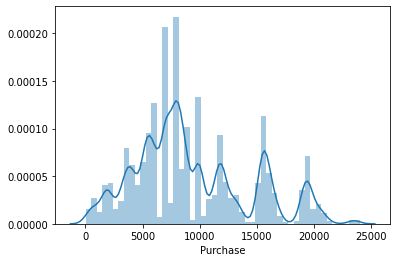

<Figure size 432x288 with 0 Axes>

In [74]:
sns.distplot(y_test)
fig = plt.figure()

In [33]:
y_pred = model.predict(X_train, num_iteration=model.best_iteration_)

In [34]:
y_pred

array([9243.93778701, 9317.8010831 , 9243.93778701, ..., 9231.32139964,
       9243.93778701, 9231.32139964])

In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)
sk_prediction = model.predict(X_test)

In [85]:
sk_prediction

array([9261.58498313, 9261.58498313, 9261.58498313, ..., 9261.58498313,
       9261.58498313, 9261.58498313])

In [35]:
y_pred_lgb = model.predict(x_test)

In [37]:
submission = pd.DataFrame({ "Purchase": y_pred_lgb,
                            "User_ID": test_df["User_ID"],
                            "Product_ID": test_df["Product_ID"]})
submission.to_csv('submission_lgb.csv', index=False)